# Worksheet 18

Name:  Haokun Wu
UID: U18377013

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

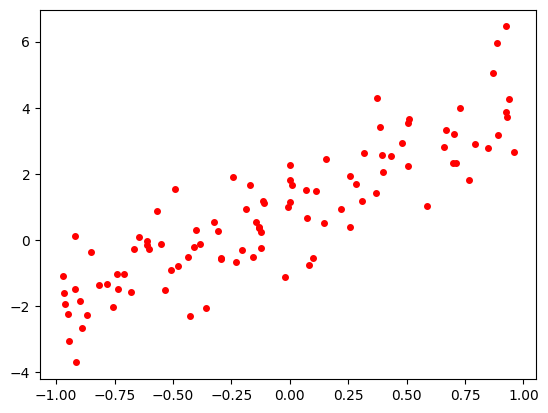

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

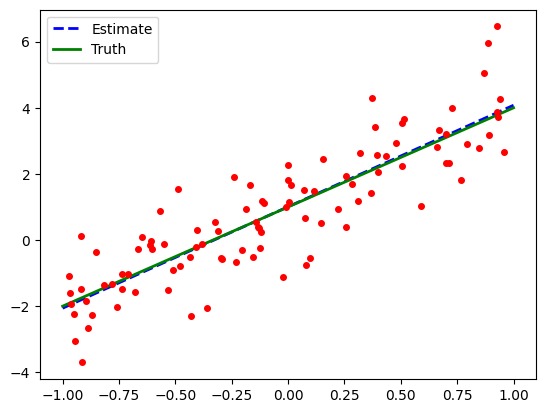

In [3]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated parameters are close to the true parameters

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

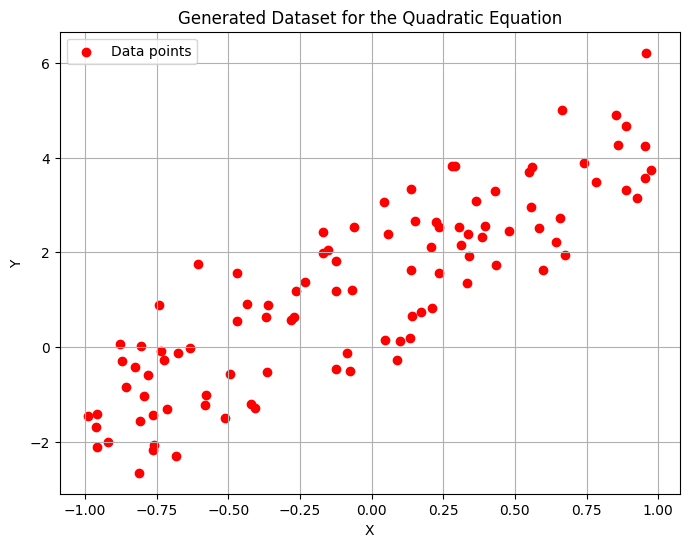

In [4]:
np.random.seed(0)

# Create a dataset for the quadratic equation y = 1 + 3*X + 0.5*X^2 + eps
SAMPLE_SIZE = 100
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # X values between -1 and 1
eps = np.random.randn(SAMPLE_SIZE)  # Epsilon for noise
y = 1 + 3 * x + 0.5 * x**2 + eps  # Y values

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='red', marker='o', label='Data points')
plt.title("Generated Dataset for the Quadratic Equation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


e) Plot the least squares estimate line through the scatter plot.

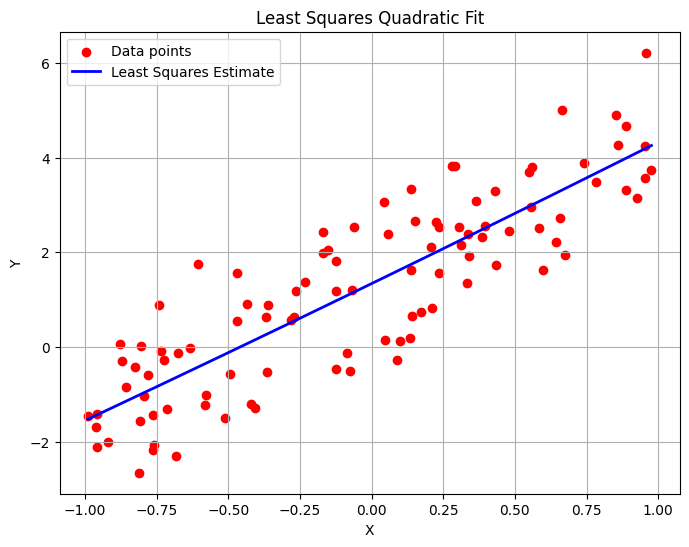

array([1.34050076, 2.93719656, 0.04809407])

In [5]:
# Create the design matrix for quadratic regression
X_quad = np.vstack((np.ones(SAMPLE_SIZE), x, x**2)).T

# Calculate the least squares estimates for the quadratic model
beta_hat_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y

# Generate a sequence of x values for plotting the fit curve
x_fit = np.linspace(x.min(), x.max(), 500)
# Calculate the y values based on the estimated coefficients
y_fit = beta_hat_quad[0] + beta_hat_quad[1] * x_fit + beta_hat_quad[2] * x_fit**2

# Plot the original scatter plot and the least squares estimate curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='red', marker='o', label='Data points')
plt.plot(x_fit, y_fit, 'b-', lw=2, label='Least Squares Estimate')
plt.title("Least Squares Quadratic Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Return the estimated coefficients
beta_hat_quad


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated intercept is slightly higher than the true intercept 



g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

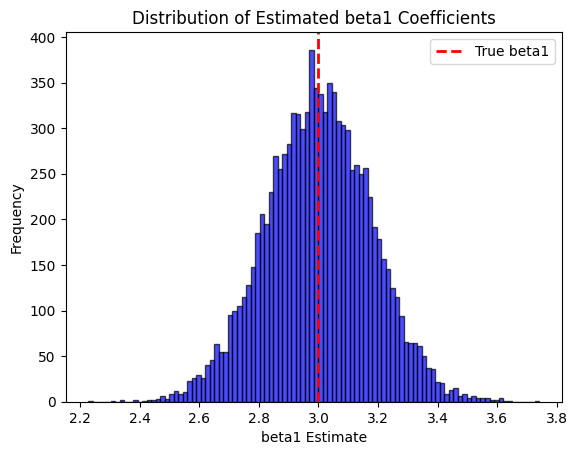

In [6]:
# Repeat the process of estimating beta a large number of times
np.random.seed(0)  # Seed for reproducibility

# True parameters
true_beta = np.array([1, 3, 0.5])

# Number of repetitions
repetitions = 10000
SAMPLE_SIZE = 100

# Store beta estimates
betas = []

for _ in range(repetitions):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    eps = np.random.randn(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + eps
    
    # Create the design matrix for quadratic regression
    X = np.vstack((np.ones(SAMPLE_SIZE), x, x**2)).T
    
    # Calculate the least squares estimates for the quadratic model
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

# Convert list of betas to numpy array for easier handling
betas = np.array(betas)

# Plot histogram of the beta1 estimates
plt.hist(betas[:, 1], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=true_beta[1], color='red', linestyle='dashed', linewidth=2, label='True beta1')
plt.title('Distribution of Estimated beta1 Coefficients')
plt.xlabel('beta1 Estimate')
plt.ylabel('Frequency')
plt.legend()
plt.show()
